In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df) 

5572

In [ ]:
df['label', 'message']

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

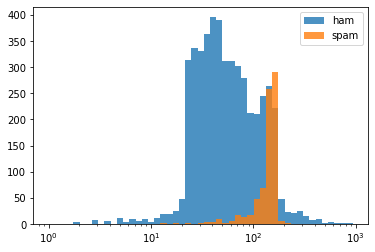

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.xscale('log') 
bins = 1.15**(np.arange(0,50)) 
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8) 
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8) 
plt.legend(('ham', 'spam')) 
plt.show() 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X feature data 
X = df[['length', 'punct']]

# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [14]:
X_train.shape

(3900, 2)

In [15]:
y_train.shape

(3900,)

In [16]:
X_test.shape

(1672, 2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_model = LogisticRegression(solver='lbfgs')

In [20]:
lr_model.fit(X_train, y_train) 

LogisticRegression()

In [21]:
from sklearn import metrics

In [22]:
predictions = lr_model.predict(X_test) 

In [23]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [25]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [26]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham', 'spam'], columns=['ham', 'spam']) 
df

,ham,spam
ham,1404,44
spam,219,5


In [27]:
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [28]:
metrics.accuracy_score(y_test,predictions) 

0.8427033492822966